# Importing the Data and The Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_csv("HumidityDataset.csv")

C:\Users\sherwin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Dropping all the libraires and selecting only rows that start after the 2010

In [2]:
df.drop(["longitude","latitude", "WaveHeight", "WavePeriod", "MeanWaveDirection", "Hmax","QC_Flag"],inplace = True, axis = 1)
df = df.iloc[331371:]
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
# df.station_id.nunique()

In [3]:
# Selecting only the values of rows that have buoys ident as M2 to M6
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]
df = df.drop(["time"], axis = 1)
# df.station_id.unique()

In [4]:
df = df.replace({ 'station_id': buoy_ident})
df = df.dropna(axis = 1, how='all')
df.reset_index(inplace = True)
df.dropna(inplace = True, how = 'all')
# df.head()

In [5]:
df = df.dropna()
df.drop('index', axis = 1, inplace = True)
# df.reset_index(inplace= True)
# df.isna()
# drop('index',axis = 1, inplace = True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values,df.iloc[:,-1].values, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

y_min = np.min(y_train)
max_min = np.max(y_train) - np.min(y_train)
y_train = (y_train-y_min)/max_min

In [7]:
# from sklearn.decomposition import PCA, FastICA
# ica = PCA(0.99)
# ica.fit(df_stand[:,:-1])
# x=ica.transform(df_stand[:,:-1])
# y = df_stand[:,-1]
# x[0:5, :]



# X_train, X_test, y_train, y_test = train_test_split(
#     df_stand[:,:-1],df_stand[:,-1], test_size=0.2, random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(
#    x,y, test_size=0.2, random_state=0)

In [8]:
X_train.shape

(68427, 8)

In [9]:

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [10]:
def model1():    
    model = keras.Sequential()
    model.add(Dense(20, activation = "relu",input_dim = 8, name = "layer1"))
    model.add(Dense(50, activation = "relu", name = "layer2"))
    model.add(Dense(100, activation = "relu", name = "layer5"))
    model.add(Dense(50, activation = "relu", name = "layer6"))

    model.add(Dense(20, activation = "relu", name = "layer7"))

    model.add(Dense(1, activation = "relu", name = "layer8"))
    model.compile(loss="mean_squared_error", optimizer='SGD')
    return model

batch_size = 2048

estimator = KerasRegressor(build_fn=model1, epochs=1000, batch_size=4096, verbose=1)
history=estimator.fit(np.asarray(X_train).astype('float32'),np.asarray(y_train).astype('float32'))



#history = model.fit(x_pca, df.iloc[:, -1], batch_size=batch_size, epochs=20, validation_split=0.1)
# estimator = KerasRegressor(build_fn=model, epochs=100, batch_size=batch_size, verbose=0)
# history = model.fit(np.asarray(x).astype('float32'),np.asarray(y).astype('float32') , epochs=150, batch_size=50,  verbose=1, validation_split=0.3)
# kfold = KFold(n_splits=5)
# results = cross_val_score(estimator,np.asarray(x).astype('float32'), np.asarray(y).astype('float32'), cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0897
Epoch 2/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0316
Epoch 3/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.0302
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0293
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0287
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0281
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 8/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0272
Epoch 9/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0268
Epoch 10/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0264
Epoch 11/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0261
Epoch 12/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0257
Epoch 13/1000
17/17 [====

17/17 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 102/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 103/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 104/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 105/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 106/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 107/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 108/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 109/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 110/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 111/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 112/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 113/1000
17/1

17/17 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 200/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 201/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 202/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 203/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 204/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 205/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 206/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 207/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 208/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 209/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 210/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 211/1000
17/1

17/17 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 298/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 299/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 300/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 301/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 302/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 303/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 304/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 305/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 306/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 307/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 308/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 309/1000
17/1

17/17 [==============================] - 0s 4ms/step - loss: 6.5693e-04
Epoch 393/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.5266e-04
Epoch 394/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.4860e-04
Epoch 395/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.4451e-04
Epoch 396/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.4034e-04
Epoch 397/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.3630e-04
Epoch 398/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.3240e-04
Epoch 399/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.2830e-04
Epoch 400/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.2461e-04
Epoch 401/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.2070e-04
Epoch 402/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.1676e-04
Epoch 403/1000
17/17 [==============================] - 0s

17/17 [==============================] - 0s 4ms/step - loss: 3.9501e-04
Epoch 487/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.9330e-04
Epoch 488/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.9156e-04
Epoch 489/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.8985e-04
Epoch 490/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.8820e-04
Epoch 491/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.8647e-04
Epoch 492/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.8474e-04
Epoch 493/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.8299e-04
Epoch 494/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.8144e-04
Epoch 495/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.7977e-04
Epoch 496/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.7822e-04
Epoch 497/1000
17/17 [==============================] - 0s

17/17 [==============================] - 0s 4ms/step - loss: 2.7541e-04
Epoch 581/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.7451e-04
Epoch 582/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.7362e-04
Epoch 583/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.7271e-04
Epoch 584/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.7177e-04
Epoch 585/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.7098e-04
Epoch 586/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.7002e-04
Epoch 587/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.6918e-04
Epoch 588/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.6831e-04
Epoch 589/1000
17/17 [==============================] - 0s 6ms/step - loss: 2.6751e-04
Epoch 590/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.6658e-04
Epoch 591/1000
17/17 [==============================] - 0s

17/17 [==============================] - 0s 4ms/step - loss: 2.0982e-04
Epoch 675/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0929e-04
Epoch 676/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0872e-04
Epoch 677/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0823e-04
Epoch 678/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0780e-04
Epoch 679/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0725e-04
Epoch 680/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0673e-04
Epoch 681/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0616e-04A: 0s - loss: 2.0599e-0
Epoch 682/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0573e-04
Epoch 683/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0528e-04
Epoch 684/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0470e-04
Epoch 685/1000
17/17 [=============

17/17 [==============================] - 0s 4ms/step - loss: 1.7168e-04
Epoch 769/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.7139e-04
Epoch 770/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.7110e-04
Epoch 771/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.7078e-04
Epoch 772/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.7048e-04
Epoch 773/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.7020e-04
Epoch 774/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6992e-04
Epoch 775/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6957e-04
Epoch 776/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6936e-04
Epoch 777/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6903e-04
Epoch 778/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6874e-04
Epoch 779/1000
17/17 [==============================] - 0s

17/17 [==============================] - 0s 4ms/step - loss: 1.4845e-04
Epoch 863/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.4829e-04
Epoch 864/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.4807e-04
Epoch 865/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.4784e-04
Epoch 866/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.4764e-04
Epoch 867/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.4747e-04
Epoch 868/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.4731e-04
Epoch 869/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.4707e-04
Epoch 870/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.4690e-04
Epoch 871/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.4669e-04
Epoch 872/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.4654e-04
Epoch 873/1000
17/17 [==============================] - 0s

17/17 [==============================] - 0s 4ms/step - loss: 1.3309e-04
Epoch 957/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3298e-04
Epoch 958/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3283e-04
Epoch 959/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3272e-04
Epoch 960/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3258e-04
Epoch 961/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3251e-04
Epoch 962/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3233e-04
Epoch 963/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3218e-04
Epoch 964/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3207e-04
Epoch 965/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3192e-04
Epoch 966/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3179e-04
Epoch 967/1000
17/17 [==============================] - 0s

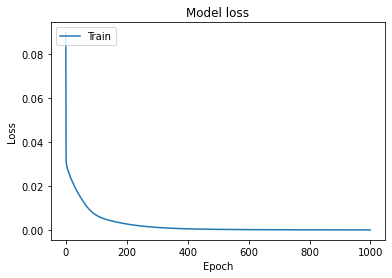

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = estimator.predict(scaler.transform(X_test))
y_pred = max_min*y_pred + y_min
print(mean_squared_error(y_test, y_pred))


5/5 [==============================] - 0s 2ms/step
0.43599326376654024


In [13]:
np.column_stack((y_test,y_pred))

array([[91.0, 91.04832458496094],
       [76.0, 74.0239486694336],
       [82.0, 82.68106842041016],
       ...,
       [90.0, 88.63153076171875],
       [71.0, 70.17703247070312],
       [94.0, 89.80867004394531]], dtype=object)

In [ ]:
predTest = scaler.inverse_transform(np.column_stack((X_test, y_pred)))
ogTest = scaler.inverse_transform(np.column_stack((X_test, y_test)))
np.column_stack((predTest[:, -1], ogTest[:, -1]))

In [ ]:
x